
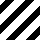
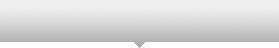
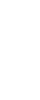
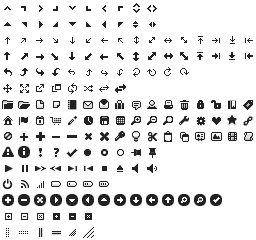
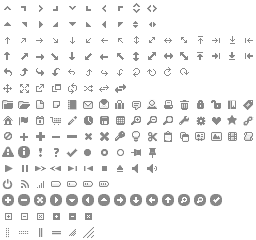
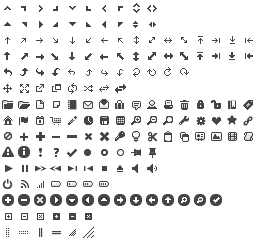
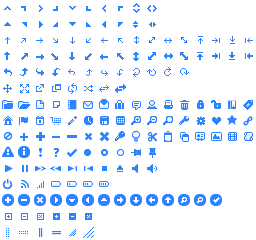
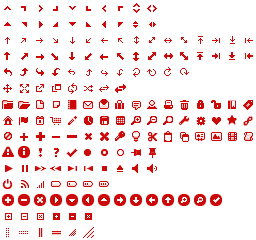
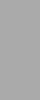
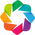
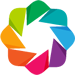
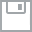
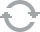
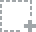
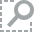
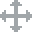
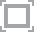
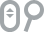

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from bokeh.plotting import figure,show,output_notebook
output_notebook()

%matplotlib inline
import statsmodels.api as sm

import statsmodels.formula.api as smf

## 1. Projectile

In [105]:
Time = [0,0.5,1,1.5,2,2.5] 
x = np.asarray(Time)

Height = [0,20.5,31.36, 36.25,30.41,28.23] 
y = np.asarray(Height) 



In [106]:
p = figure

p = figure(title='Heigt vs. Time of Projectile')
p.circle(x, y, size=8,color='blue')
show(p)
# Classic quadratic function

In [114]:
X = np.c_[x**2, x, np.zeros(len(x))]
#X = np.c_[x**2, x] This might be the better way to go about this, however, I had a problem when using it. 

res = sm.OLS(y, X).fit()


In [115]:
c, b, a = res.params
#print c, b, a
#print res.bse # What is bse??
#help(res.bse)

#Determine time when the projectile hits the ground 
z = 3
while (c*z*z + b*z + a > 0):
    z += 0.001

print z 

#wondering if I can use predict() to do the above. 
print res.predict() # my understanding is that this outputs the 6 y points for X. However, how do I enter another val
#g = np.array([1,1,3.282]) This works as input into re.predict
#g = np.array([3.282]) This does not work as input into np.array
#print g
#print res.predict(g)

#print res.predict([3.382,3.382,0]) #feeling pretty dumb, but I don't get how to use res.predict manually w/o vander
# with just one input result

-13.3832298137 43.911515528
[  0.          18.60995031  30.52828571  35.75500621  34.2901118
  26.13360248]


In [116]:
xx = np.linspace(0,3.31,30) # creates an array with 20 values between 0 - 3.5


yy = res.predict(np.vander(xx,3)) #Quadratic function, so value 3.  Do no understand np.vander though

In [119]:
p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

#p.line(xx, yy, color='red')
p.line(xx, yy, color='red')

show(p)

## 2. Healthcare Costs

In [52]:
Year = [1976,1980,1987,1993,1998] 
x = np.asarray(Year)

Cost = [618,860,1324,1865,2256] 
y = np.asarray(Cost) 


In [26]:
# The data follows a linear pattern!

#p = figure
#p = figure(title='Healthcare Costs over time')
#p.circle(x, y, size=8,color='blue')
#show(p)


In [27]:
X = sm.add_constant(x, prepend=True)
results = sm.OLS(y,X).fit()
intercept, slope = results.params

In [28]:
p = figure

p = figure(title='Healthcare Costs over time')
p.circle(x, y, size=8,color='blue')

x1 = [int(x.min()),int(x.max())]
y1 = [intercept + slope*int(x.min()), intercept + slope*int(x.max())]

p.line(x1,y1,color='red')
show(p)

In [29]:
#Determine time when the healthcare per person will reach $2,800
z = 2000
while (intercept + slope*z < 2800):
    z += 1

print z 

2006


## 3. Another fit with regularization

In [90]:
#X_data = '-1,0,1,2,3,5,7,9'.split(',')
#Y_data = '-1,3,2.5,5,4,2,5,4'.split(',')
#dataset = zip(X_data, Y_data)
#df = pd.DataFrame(dataset, columns=('Ex','Why'))

#x = df['Ex'].values
#y = df['Why'].values

x = np.array([-1,0,1,2,3,5,7,9])
y = np.array([-1,3,2.5,5,4,2,5,4])
              


In [91]:
p = figure()
p.circle(x,y, size=8, color='blue')
show(p)

### 3a) Linear Regression

In [92]:
#Linear Regresssion

X = np.vander(x, 2)

In [92]:
X

array([[-1,  1],
       [ 0,  1],
       [ 1,  1],
       [ 2,  1],
       [ 3,  1],
       [ 5,  1],
       [ 7,  1],
       [ 9,  1]])

In [93]:
res = sm.OLS(y, X).fit()
print res.params
res.summary()

[ 0.31432749  2.04093567]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     2.700
Date:                Sun, 23 Aug 2015   Prob (F-statistic):              0.151
Time:                        17:59:10   Log-Likelihood:                -14.763
No. Observations:                   8   AIC:                             33.53
Df Residuals:                       6   BIC:                             33.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3143      0.191      1.643      0.151        -0.154     0.782
const          2.0409      0.882      2.315      0.060        -0.117     4.199
==============================================================================
Omnibus:                        0.365   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.410
Skew:                          -0.351   Prob(JB):                        0.815
Kurtosis:                       2.142   Cond. No.                         6.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-2,10,100)
p.line(xx, res.predict(np.vander(xx,2)), color='red')
show(p)

In [95]:
# Regularization

from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = .2)
ridge.fit(np.vander(x, 2), y)

lasso = Lasso(alpha = 1)
lasso.fit(np.vander(x, 2), y)

p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-2,10,100)
p.line(xx, res.predict(np.vander(xx,2)), color='red')
p.line(xx, ridge.predict(np.vander(xx,2)), color='green')
p.line(xx, lasso.predict(np.vander(xx,2)), color='cyan')
show(p)

### 3b) Quadratic Fit

In [96]:
X = np.c_[x**2, x, np.ones(len(x))]
res = sm.OLS(y, X).fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     2.422
Date:                Sun, 23 Aug 2015   Prob (F-statistic):              0.184
Time:                        17:59:26   Log-Likelihood:                -13.539
No. Observations:                   8   AIC:                             33.08
Df Residuals:                       5   BIC:                             33.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0857      0.064     -1.338      0.239        -0.250     0.079
x2             0.9956      0.540      1.843      0.125        -0.393     2.384
const          1.6484      0.879      1.875      0.120        -0.612     3.909
==============================================================================
Omnibus:                        1.161   Durbin-Watson:                   2.343
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                0.680
Skew:                          -0.634   Prob(JB):                        0.712
Kurtosis:                       2.342   Cond. No.                         56.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')



xx = np.linspace(-2,10,100)

#print np.vander(xx,3)

p.line(xx, res.predict(np.vander(xx,3)), color='red')
show(p)

In [99]:
# Regularization

from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = .2)
ridge.fit(np.vander(x, 3), y)

lasso = Lasso(alpha = 1)
lasso.fit(np.vander(x, 3), y)

p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-2,10,1000)
p.line(xx, res.predict(np.vander(xx,3)), color='red')
p.line(xx, ridge.predict(np.vander(xx,3)), color='green')
p.line(xx, lasso.predict(np.vander(xx,3)), color='cyan')
show(p)

### 3c) Quintic fit

In [293]:

X = np.c_[x**5, x**4, x**3, x**2, x, np.ones(len(x))]
res = sm.OLS(y, X).fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     2.567
Date:                Sat, 22 Aug 2015   Prob (F-statistic):              0.304
Time:                        13:43:14   Log-Likelihood:                -8.2343
No. Observations:                   8   AIC:                             28.47
Df Residuals:                       2   BIC:                             28.95
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0036      0.004     -0.964      0.437        -0.019     0.012
x2             0.0567      0.072      0.793      0.511        -0.251     0.364
x3            -0.1953      0.447     -0.437      0.705        -2.118     1.728
x4            -0.4961      0.967     -0.513      0.659        -4.658     3.666
x5             2.5612      0.804      3.186      0.086        -0.898     6.020
const          2.0252      1.143      1.772      0.218        -2.891     6.942
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   3.327
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                0.799
Skew:                          -0.765   Prob(JB):                        0.671
Kurtosis:                       3.241   Cond. No.                     6.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [294]:
p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-2,10,100)
p.line(xx, res.predict(np.vander(xx,6)), color='red')
show(p)

In [64]:
# Regularization

from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = .2)
ridge.fit(np.vander(x, 6), y)

lasso = Lasso(alpha = 1)
lasso.fit(np.vander(x, 6), y)

p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-2,10,1000)
p.line(xx, res.predict(np.vander(xx,6)), color='red')
p.line(xx, ridge.predict(np.vander(xx,6)), color='green')
p.line(xx, lasso.predict(np.vander(xx,6)), color='cyan')
show(p)


/Users/sibesiech2/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


ValueError: shapes (1000,6) and (2,) not aligned: 6 (dim 1) != 2 (dim 0)

## 4. Red Wine Quality from ics.uci.edu

Note: Not sure i fully understand this correctly, but in essence, the way I think about it is that the outcome variable can either be one class or another class, so what I do is: 
1. transform the target variable into one of two classes, i.e. 0 (quality 3-5) or 1 (quality 6-8)
2. create feature array and target array
3. create model

I also use CVV to validate that accuracy of the model. 

What I did not do -> normalize. Need more experience on how to do that in a decent manner. 
Also, I need more experience 'feeding' the model one row of data. 
Also, I am trying to understand whether the model coefficients are simply the parameters of the logit function, i.e. 
a0 + a1x1 + a2x2 + a3x3 + ..... anxn

It is also unclear to me how I would use regularization in this case.

Regularization is also not very clear to me from the above section. 
In the above section I also struggle understanding np.vander
Also, what is x.shape in lab6? 

In [22]:
#Was struggling with getting in headers correctly directly from .csv, so removed them from file and adding separately
fcolumns = 'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality'.split(',')

In [23]:
data = pd.read_csv("./winequality-red2.csv", sep=';', names=fcolumns)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [24]:
data.shape

(1599, 12)

In [79]:
data_n = pd.DataFrame()
for col in data.columns:
    data_n[col] = data[col].apply(lambda x: float(x)/(10**(len(str(data[col].max()))-1)) )
data_n.head()

# 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.0074,0.00070,0.0000,0.0019,0.000008,0.011,0.0034,9.978000e-07,0.00351,0.0056,0.0094,5
1,0.0078,0.00088,0.0000,0.0026,0.000010,0.025,0.0067,9.968000e-07,0.00320,0.0068,0.0098,5
2,0.0078,0.00076,0.0004,0.0023,0.000009,0.015,0.0054,9.970000e-07,0.00326,0.0065,0.0098,5
3,0.0112,0.00028,0.0056,0.0019,0.000007,0.017,0.0060,9.980000e-07,0.00316,0.0058,0.0098,6
4,0.0074,0.00070,0.0000,0.0019,0.000008,0.011,0.0034,9.978000e-07,0.00351,0.0056,0.0094,5


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


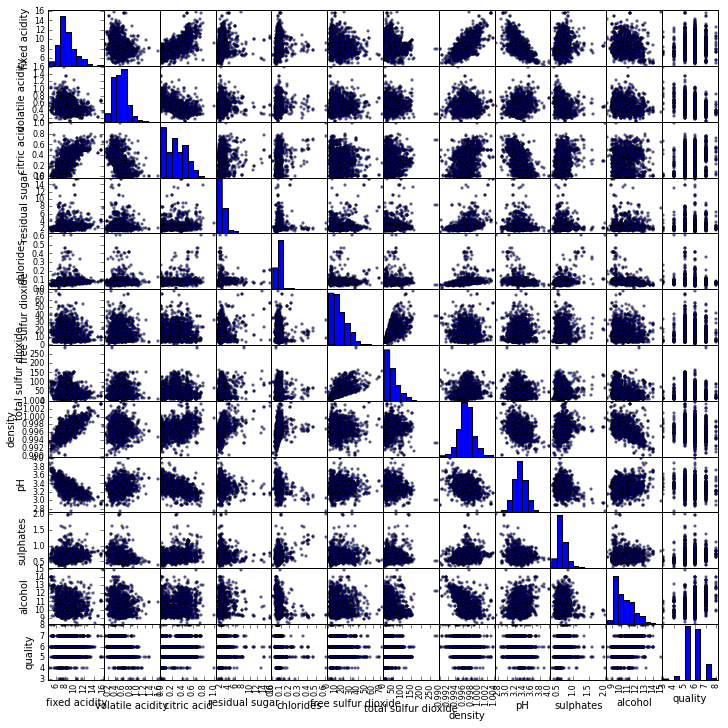

In [68]:
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(data, figsize=(12,12))


In [69]:
# There are 11 features. They are not completely normalized but deviation is within an order of magnitude

In [101]:
data.groupby('quality')['quality'].count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [102]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [103]:
x = data[[  'fixed acidity',
            'volatile acidity',
            'citric acid',
            'residual sugar',
            'chlorides',
            'free sulfur dioxide',
            'total sulfur dioxide',
            'density',
            'pH',
            'sulphates',
            'alcohol',
            'sulphates']].values
y = data['quality'].values

#X = sm.add_constant(x, prepend=True)
X = x
results = sm.OLS(y, X).fit()

results.params


array([  4.19374044e-03,  -1.09974310e+00,  -1.84145975e-01,
         7.07117376e-03,  -1.91141882e+00,   4.54780885e-03,
        -3.31855188e-03,   4.52914616e+00,  -5.22898302e-01,
         4.43538062e-01,   2.97022815e-01,   4.43538062e-01])

In [104]:
results.summary()

# use OLS.predict to try this out

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.108e+04
Date:                Sun, 23 Aug 2015   Prob (F-statistic):               0.00
Time:                        18:02:44   Log-Likelihood:                -1569.7
No. Observations:                1599   AIC:                             3161.
Df Residuals:                    1588   BIC:                             3221.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0042      0.016      0.255      0.799        -0.028     0.036
x2            -1.0997      0.120     -9.157      0.000        -1.335    -0.864
x3            -0.1841      0.147     -1.251      0.211        -0.473     0.105
x4             0.0071      0.012      0.587      0.557        -0.017     0.031
x5            -1.9114      0.418     -4.575      0.000        -2.731    -1.092
x6             0.0045      0.002      2.102      0.036         0.000     0.009
x7            -0.0033      0.001     -4.565      0.000        -0.005    -0.002
x8             4.5291      0.625      7.243      0.000         3.303     5.756
x9            -0.5229      0.160     -3.268      0.001        -0.837    -0.209
x10            0.4435      0.055      8.006      0.000         0.335     0.552
x11            0.2970      0.017     17.217      0.000         0.263     0.331
x12            0.4435      0.055      8.006      0.000         0.335     0.552
==============================================================================
Omnibus:                       25.388   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.530
Skew:                          -0.159   Prob(JB):                     7.09e-09
Kurtosis:                       3.680   Cond. No.                     4.68e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [105]:
# Had done this incorrectly at first, reducing it to a logistic regression
#data.quality.replace([3,4,5,6,7,8],[0,0,0,1,1,1],inplace=True)

In [101]:
# Did not figure out who to regularize with multiple parameters. 